# Convolutional Neural Nets
### or, When What Your Neighbor Says Matters

![conv_net](img/Cnn_layer.png)

### What does each filter look like?

![mapping](img/conv_math.jpg)

Here you can see the output 'image' will be smaller than the input by the width of the border around the center of each kernel.

In [ ]:
# # Digit Recognizer in Python using Convolutional Neural Nets
# by [Koba Khitalishvili](http://www.kobakhit.com/)

In [8]:
%matplotlib inline

import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## MNIST

In [9]:
dataset = pd.read_csv("train.csv")
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values
test = pd.read_csv("test.csv").values

In [10]:
train.shape

(42000, 784)

In [11]:
test.shape

(28000, 784)

### Why doesn't this converge when data is normalized?

In [12]:
target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

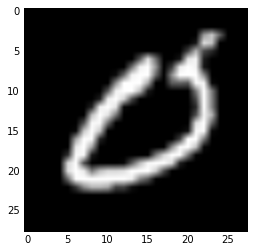

In [13]:
plt.imshow(train[1729][0], cmap=cm.Greys_r)

### Size of Filters
- Should it be odd?
- What does zero padding have to do with anything?

In [15]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),        # If you add layers here, add them below as well
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),   
        ('conv2', layers.Conv2DLayer),
        ('hidden3', layers.DenseLayer),
        ('dropout3', layers.DropoutLayer),
        ('output', layers.DenseLayer),
        ],

    input_shape=(None, 1, 28, 28),
    conv1_num_filters=64,                     
    conv1_filter_size=(5, 5), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    conv2_num_filters=32, 
    conv2_filter_size=(3, 3),    
    conv2_nonlinearity=lasagne.nonlinearities.rectify,
        
    hidden3_num_units=256,
    output_num_units=10,
    dropout3_p=0.5,
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(15).fit(train,target) # train the CNN model for 15 epochs

# Neural Network with 842154 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv1     64x24x24
  2  pool1     64x12x12
  3  conv2     32x10x10
  4  hidden3   256
  5  dropout3  256
  6  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       1.80986       0.36487      4.96034      0.88724  69.72s
      2       0.49768       0.22579      2.20423      0.93181  71.51s
      3       0.35106       0.17865      1.96504      0.94614  69.15s
      4       0.28069       0.15145      1.85334      0.95294  69.69s
      5       0.23452       0.14101      1.66321      0.95715  73.65s
      6       0.21109       0.12864      1.64099      0.95963  79.31s
      7       0.19393       0.11920      1.62696      0.96395  73.06s
      8       0.17254       0.11049      1.56163      0.96561  79.12s
      9       0.16560       0.1080

#### Dropout
- Why does the train loss stay above the validation loss?
- When should we stop trying more epochs?
- Why does it take so much longer?

In [16]:
pred = cnn.predict(test)

# save results
np.savetxt('submission_cnn.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

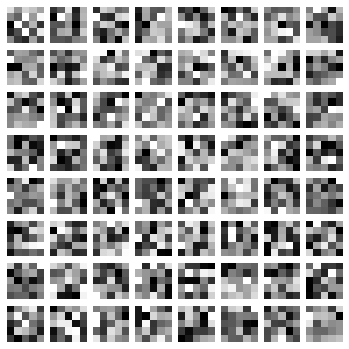

In [24]:
visualize.plot_conv_weights(cnn.layers_['conv1'])
plt.show()

## From [Understanding Convolutional Neural Networks for NLP](http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/)

### Averaging each pixel with its neighboring values blurs an image:

![blur_kernel](img/conv_blur.png)![taj_mahal](img/taj.jpg)

### Taking the difference between a pixel and its neighbors detects edges:

(To understand this one intuitively, think about what happens in parts of the image that are smooth, where a pixel color equals that of its neighbors: The additions cancel and the resulting value is 0, or black. If there’s a sharp edge in intensity, a transition from white to black for example, you get a large difference and a resulting white value)

![edge_kernel](img/edge.png)![taj_mahal_edge](img/edge_taj.jpg)

In [19]:
x = train[1729][0].reshape(1, 1, 28, 28)

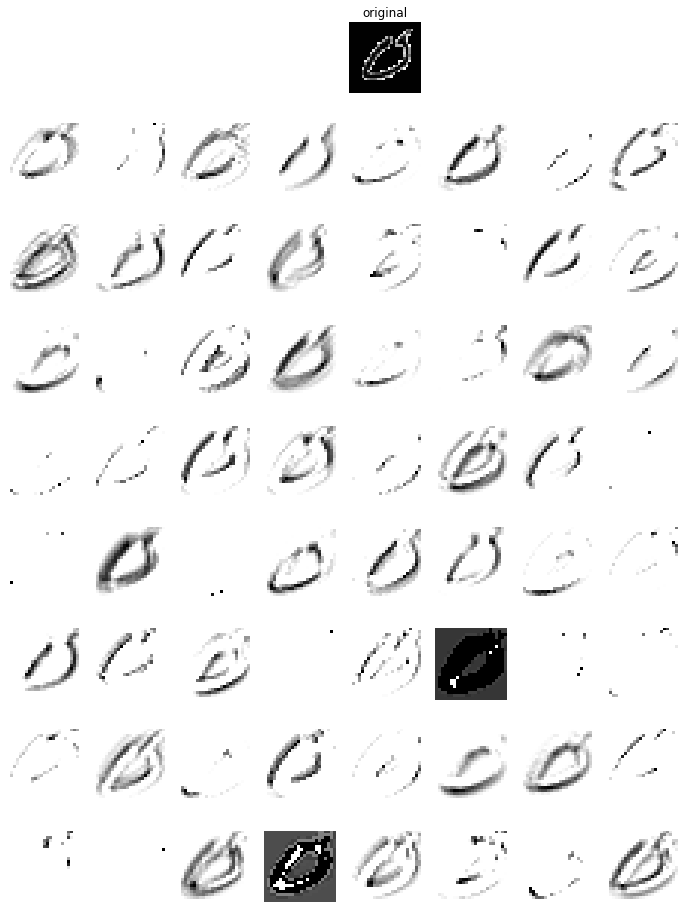

In [21]:
visualize.plot_conv_activity(cnn.layers_['conv1'], x, figsize=(12, 16))
plt.show()

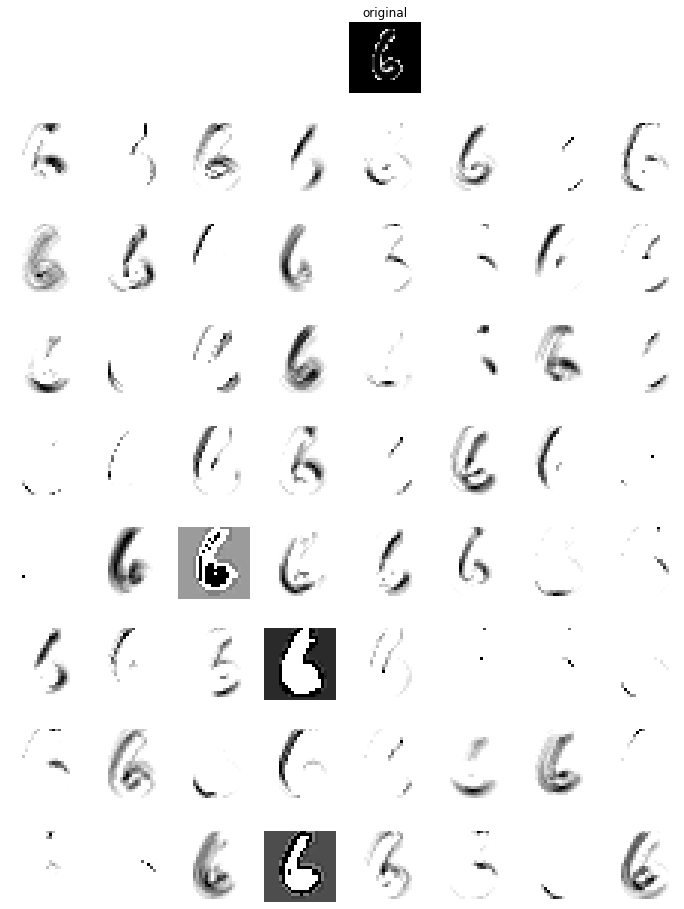

In [22]:
x = train[1730][0].reshape(1, 1, 28, 28)
visualize.plot_conv_activity(cnn.layers_['conv1'], x, figsize=(12, 16))
plt.show()

## Second Layer Magic
- What is this learning?
- Activations for a given input.

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


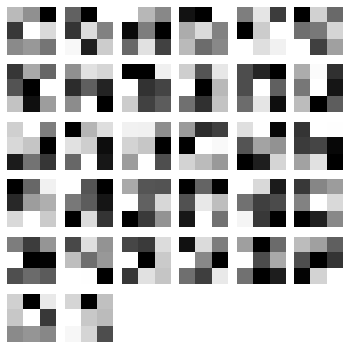

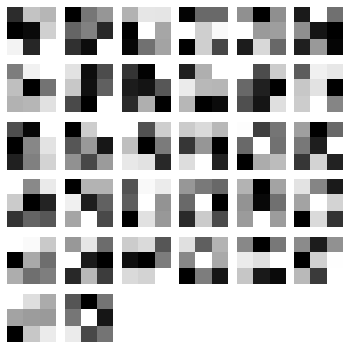

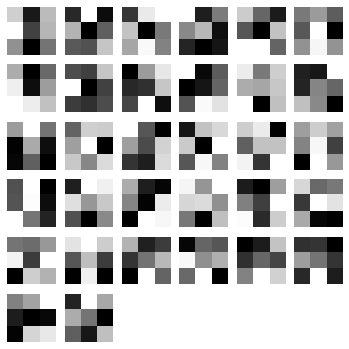

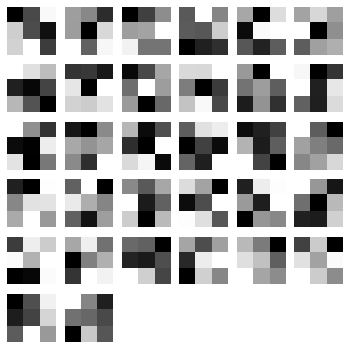

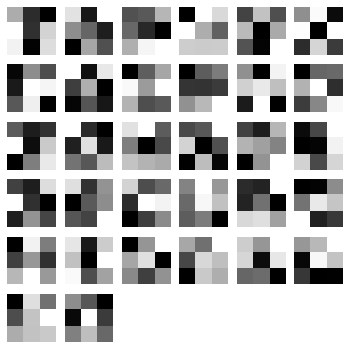

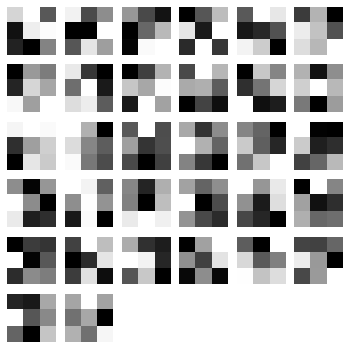

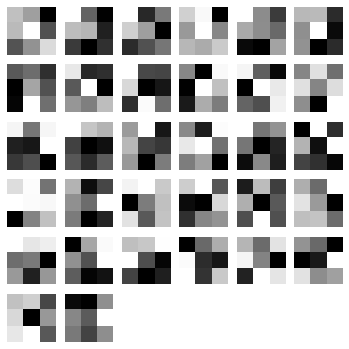

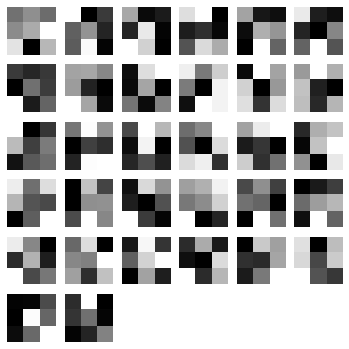

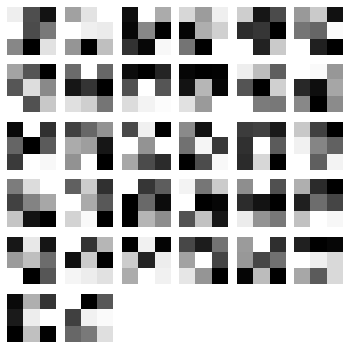

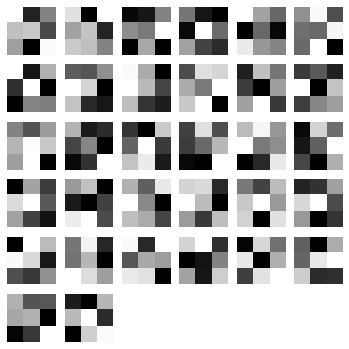

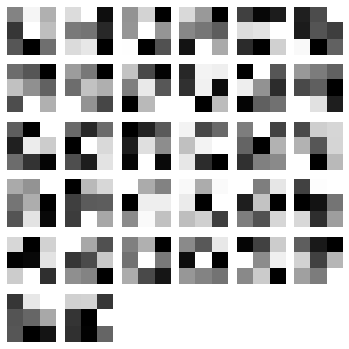

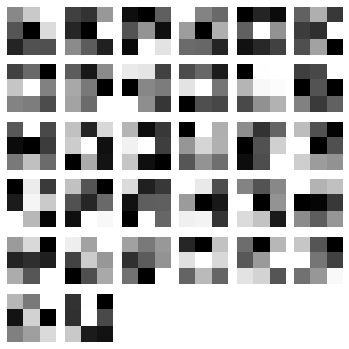

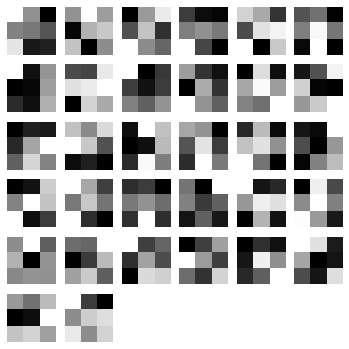

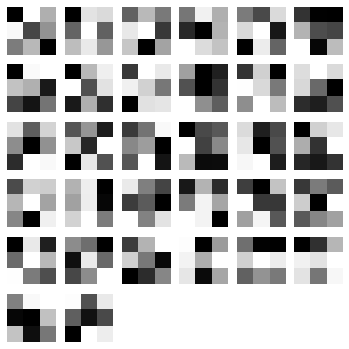

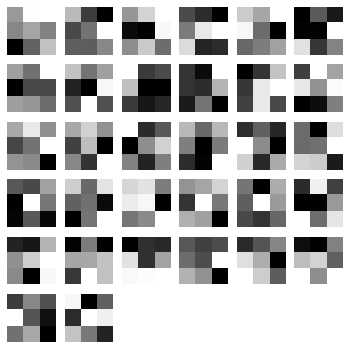

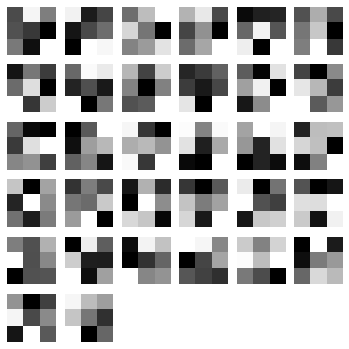

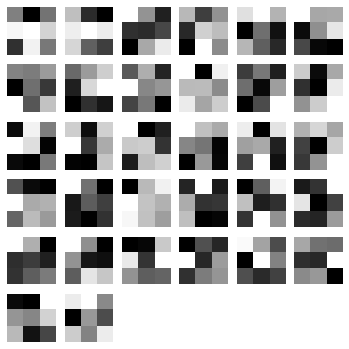

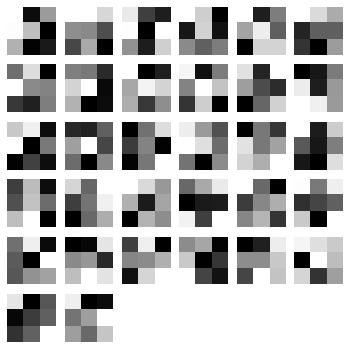

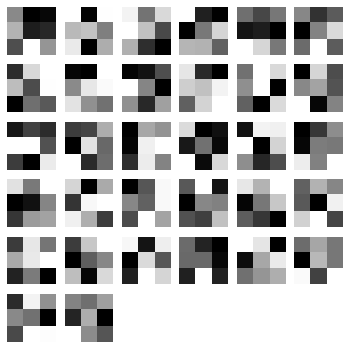

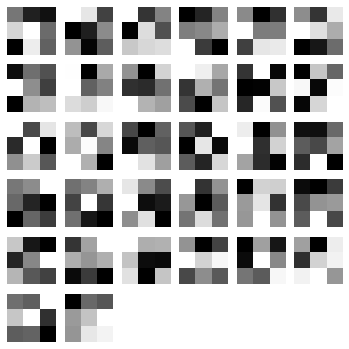

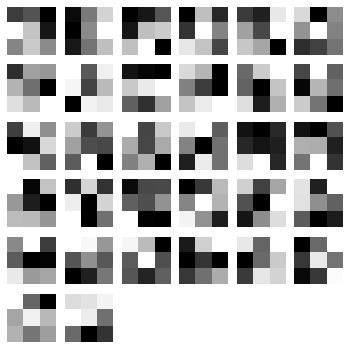

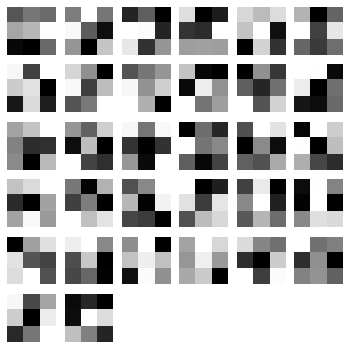

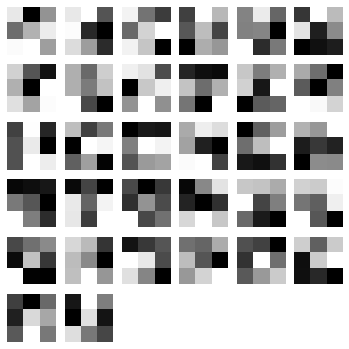

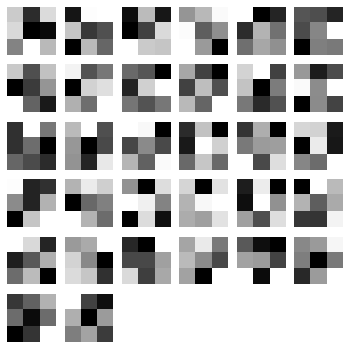

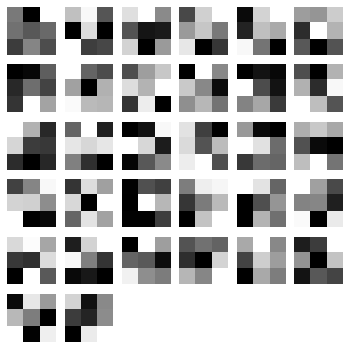

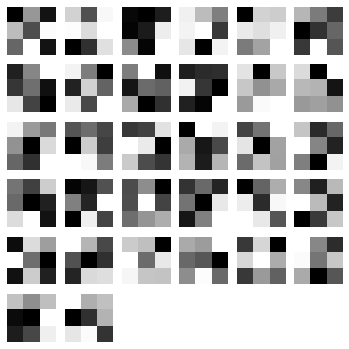

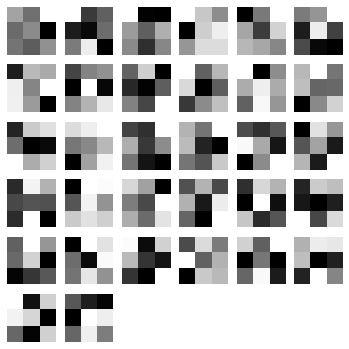

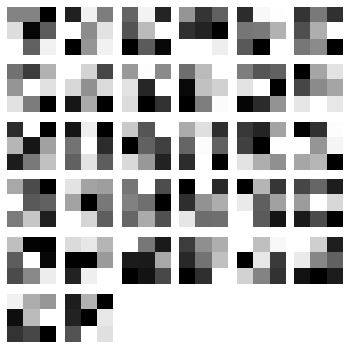

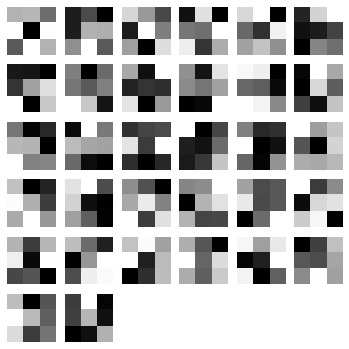

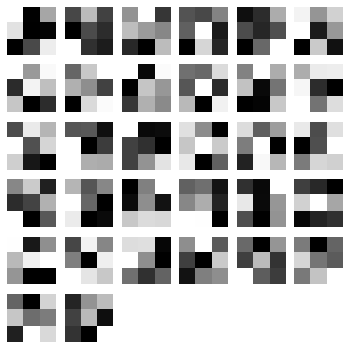

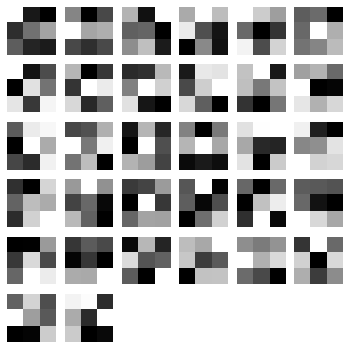

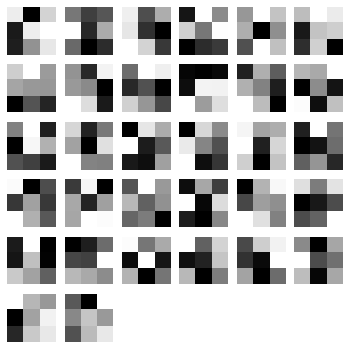

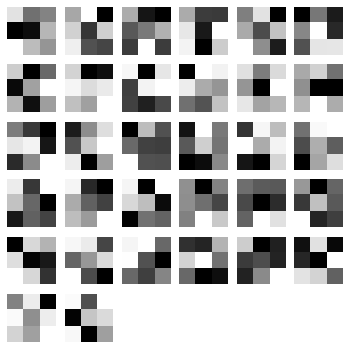

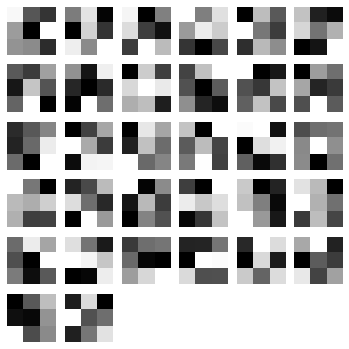

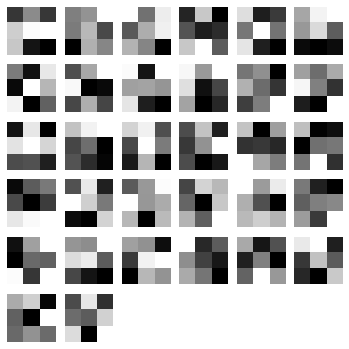

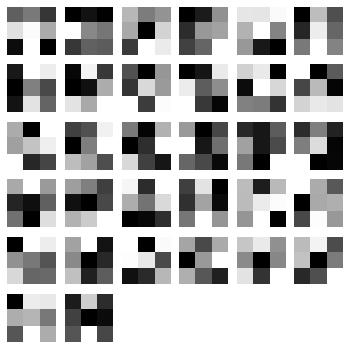

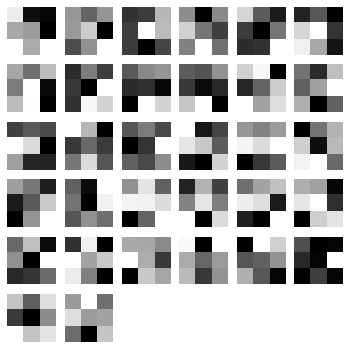

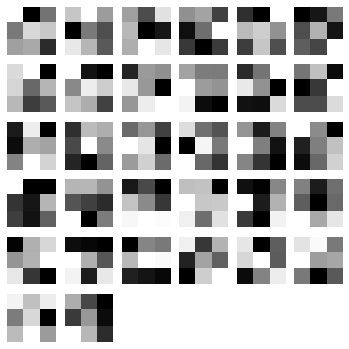

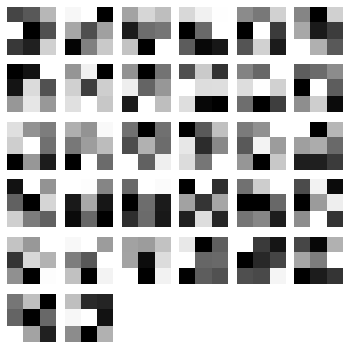

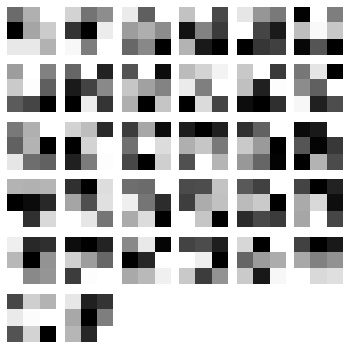

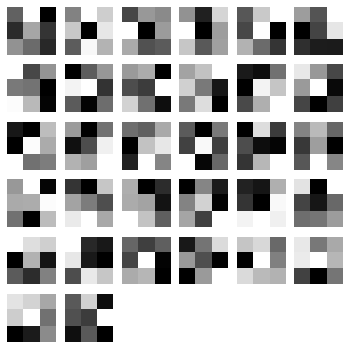

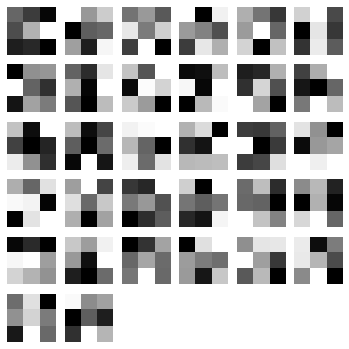

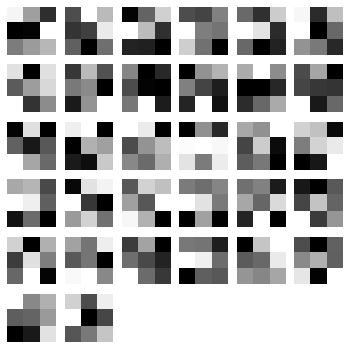

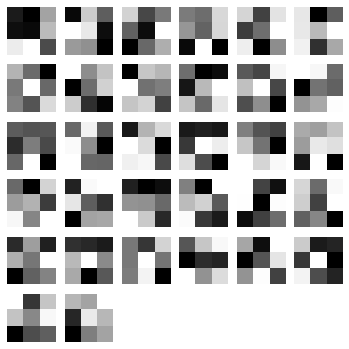

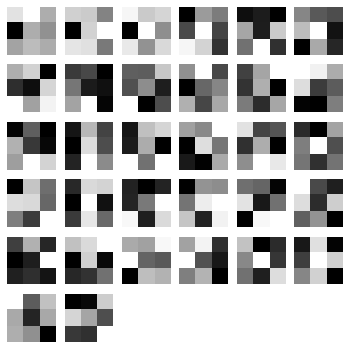

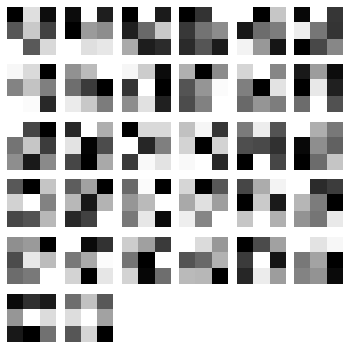

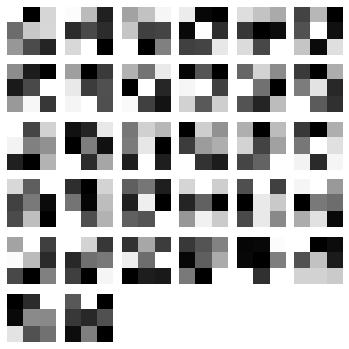

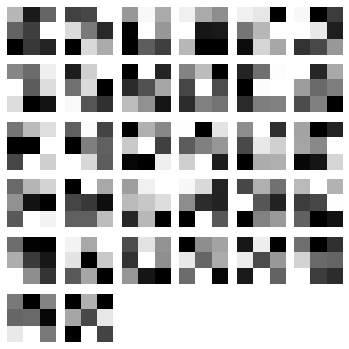

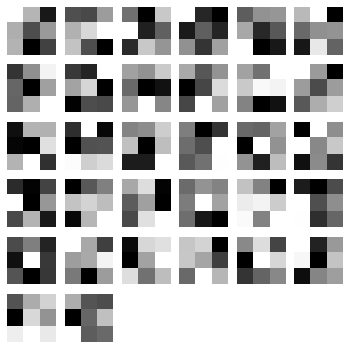

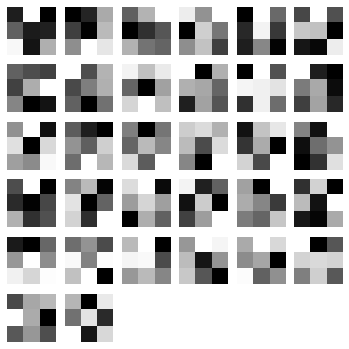

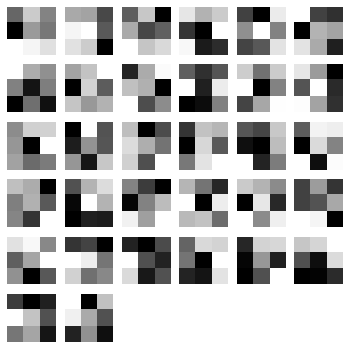

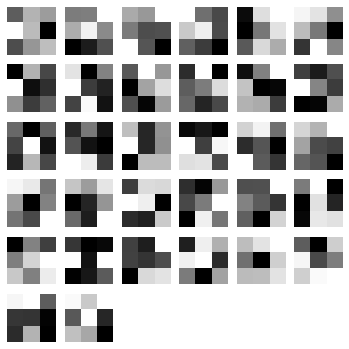

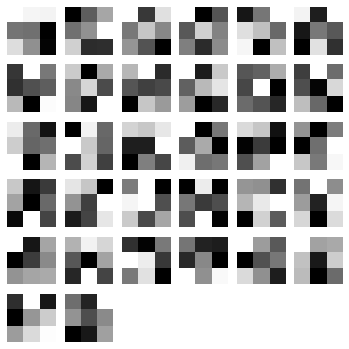

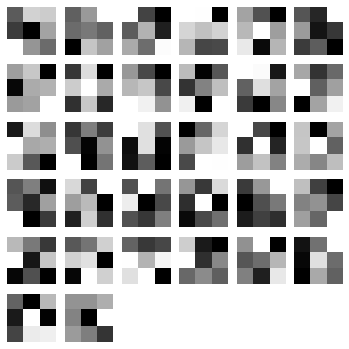

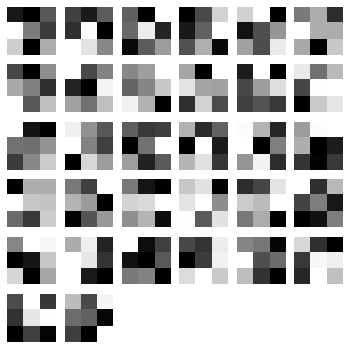

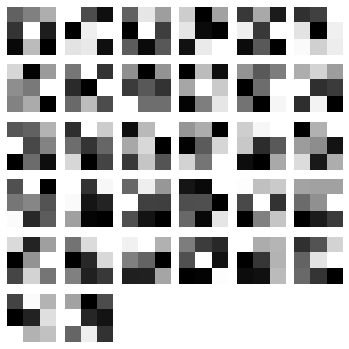

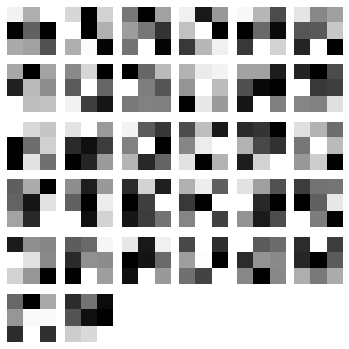

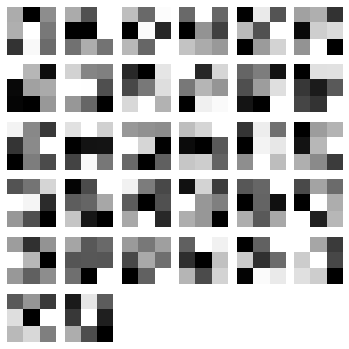

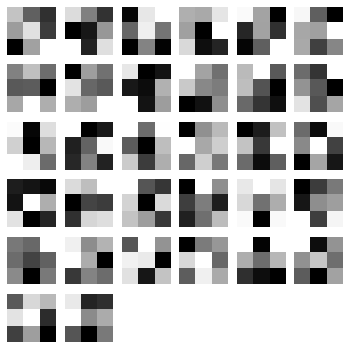

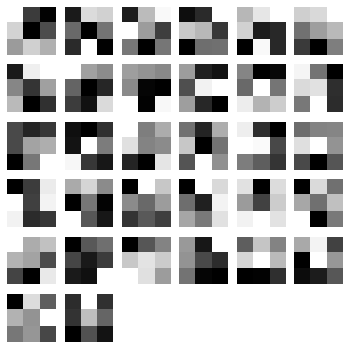

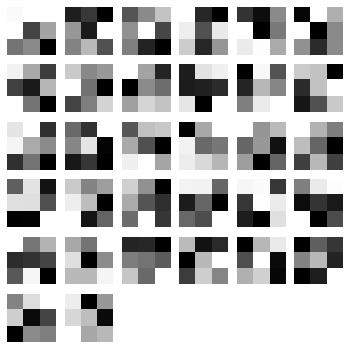

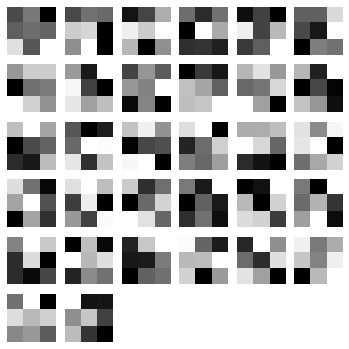

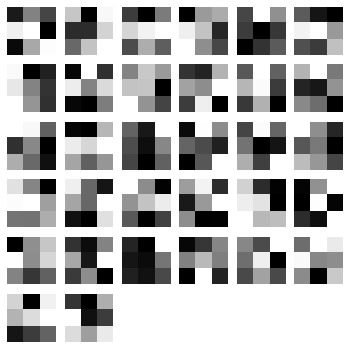

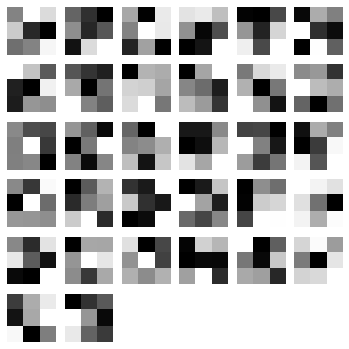

In [25]:
visualize.plot_conv_weights(cnn.layers_['conv2'])
plt.show()

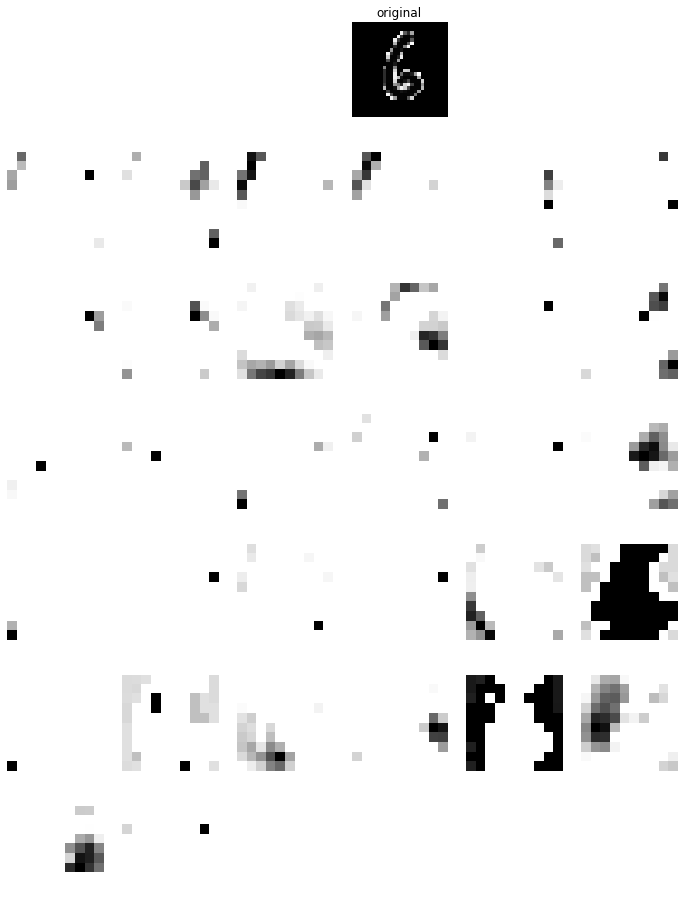

In [23]:
visualize.plot_conv_activity(cnn.layers_['conv2'], x, figsize=(12, 16))
plt.show()

## Need to normalize data?

## Visualize number, after 1st layer, after 2nd layer, filter weights